You should implement at least the modules Linear (fully connected layer), ReLU , Tanh , Sequential
to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sequential import Sequential
from linear import Linear
from activations import ReLU, Tanh
from losses import MSE
from utils import build_data

In [4]:
import warnings
warnings.filterwarnings("ignore", message="other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.")

In [5]:
x_train, y_train = build_data(10000)
x_validation, y_validation = build_data(10000)

In [6]:
def build_model():
    model = Sequential(MSE(), input_size=2)
    model.add_layer(Linear(2, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(Tanh(25))
    model.add_layer(Linear(25, 2))
    return model

In [7]:
model = build_model()
model.fit(x_train, y_train, x_validation, y_validation, epochs=50, step_size=0.001)

100%|██████████| 50/50 [01:57<00:00,  2.35s/it]


Training loss : 0.05297510325908661
Training accuracy : 0.9625

Validation loss : 0.05437537282705307
Validation accuracy : 0.9601


(0.9625, 0.9601)

In [8]:
preds = model.predict(x_validation)

In [9]:
def get_coords(x, indexes):
    xs = []
    ys = []
    for i in indexes:
        xs.append(x[i][0])
        ys.append(x[i][1])
    return xs, ys

In [10]:
x1, y1 = get_coords(x_validation, np.where(preds != y_validation)[0])
x2, y2 = get_coords(x_validation, np.where(preds == y_validation)[0])

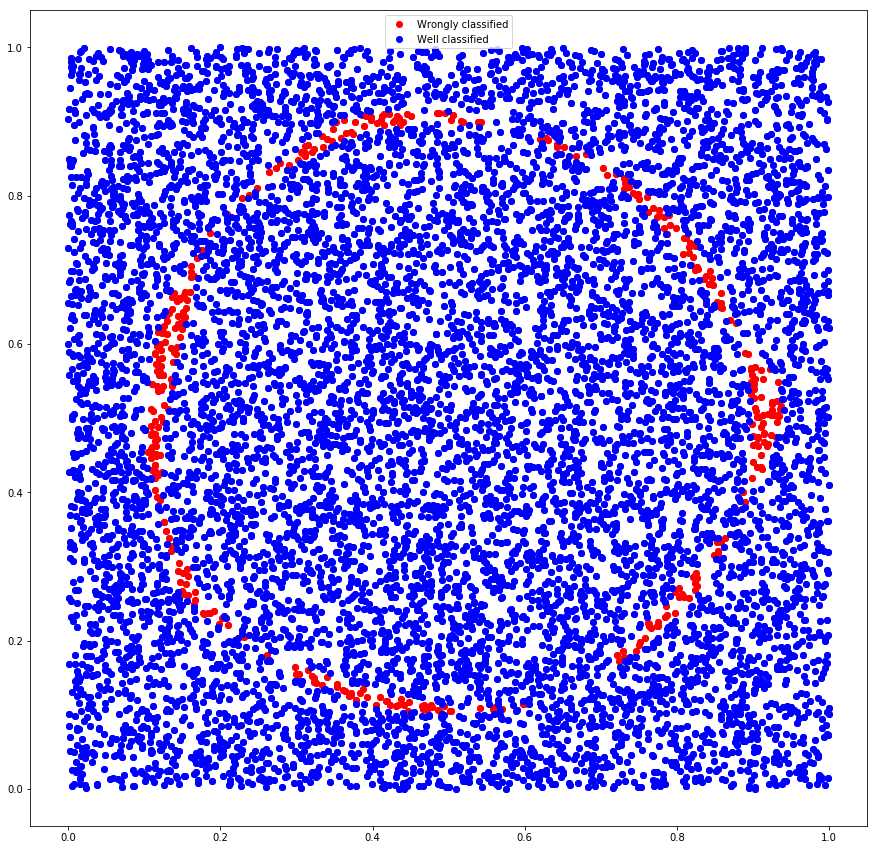

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(x1, y1, 'ro', color='red', label='Wrongly classified')
plt.plot(x2, y2, 'ro', color='blue', label='Well classified')
plt.legend()

We see that the classifier makes mistakes on the boundary which is normal.